In [1]:
#Analisis del modelo Hibrido, componentes principales

In [2]:
#Descripcion Matemetica: Formulas utilizadas.

#Modelo de Black-Scholes:

In [2]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

In [4]:
#Simulador.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from ipywidgets import interact, widgets

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def plot_black_scholes(S, K, T, r, sigma):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    S_range = np.linspace(S - 20, S + 20, 20)
    K_range = np.linspace(K - 20, K + 20, 20)

    X, Y = np.meshgrid(S_range, K_range)
    Z = np.zeros_like(X)

    for i in range(len(S_range)):
        for j in range(len(K_range)):
            Z[i, j] = black_scholes_call(X[i, j], Y[i, j], T, r, sigma)

    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax.set_title('Black-Scholes Call Price Surface')
    ax.set_xlabel('S')
    ax.set_ylabel('K')
    ax.set_zlabel('Call Price')

    plt.show()

interact(plot_black_scholes, S=(80, 120, 1), K=(80, 120, 1), T=(0.1, 2, 0.1), r=(0.01, 0.1, 0.01), sigma=(0.01, 0.5, 0.01))


interactive(children=(IntSlider(value=100, description='S', max=120, min=80), IntSlider(value=100, description…

<function __main__.plot_black_scholes(S, K, T, r, sigma)>

In [4]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from ipywidgets import interact, widgets

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def interactive_black_scholes(S_min, S_max, volatilidad_min, volatilidad_max):
    # Generate random data for call prices
    S_data = np.random.uniform(S_min, S_max, 1000)
    volatilidad_data = np.random.uniform(volatilidad_min, volatilidad_max, 1000)
    call_prices_data = [black_scholes_call(S, 100, 1, 0.05, volatilidad) for S, volatilidad in zip(S_data, volatilidad_data)]

    # Generate a grid for interpolation
    S_grid, volatilidad_grid = np.meshgrid(np.linspace(S_min, S_max, 100), np.linspace(volatilidad_min, volatilidad_max, 100))

    # Interpolate call prices
    call_prices_smooth = griddata((S_data, volatilidad_data), call_prices_data, (S_grid, volatilidad_grid), method='cubic')

    # Plot the surface
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(S_grid, volatilidad_grid, call_prices_smooth, cmap='viridis')
    ax.set_xlabel('S')
    ax.set_ylabel('Volatilidad')
    ax.set_zlabel('Precio de la Opción')
    ax.set_title('Superficie Suavizada de Precios de Opción (Black-Scholes)')
    plt.show()

# Create interactive sliders for adjusting parameters
interact(interactive_black_scholes,
         S_min=widgets.FloatSlider(min=80, max=100, step=1, value=80, description='S_min'),
         S_max=widgets.FloatSlider(min=100, max=120, step=1, value=120, description='S_max'),
         volatilidad_min=widgets.FloatSlider(min=0.01, max=0.2, step=0.01, value=0.01, description='Volatilidad_min'),
         volatilidad_max=widgets.FloatSlider(min=0.2, max=0.5, step=0.01, value=0.5, description='Volatilidad_max'))



interactive(children=(FloatSlider(value=80.0, description='S_min', min=80.0, step=1.0), FloatSlider(value=120.…

<function __main__.interactive_black_scholes(S_min, S_max, volatilidad_min, volatilidad_max)>

In [5]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from ipywidgets import interact, widgets

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def interactive_black_scholes(S_min, S_max, volatilidad_min, volatilidad_max):
    # Generate random data for call prices
    S_data = np.random.uniform(S_min, S_max, 1000)
    volatilidad_data = np.random.uniform(volatilidad_min, volatilidad_max, 1000)
    call_prices_data = [black_scholes_call(S, 100, 1, 0.05, volatilidad) for S, volatilidad in zip(S_data, volatilidad_data)]

    # Generate a grid for interpolation
    S_grid, volatilidad_grid = np.meshgrid(np.linspace(S_min, S_max, 100), np.linspace(volatilidad_min, volatilidad_max, 100))

    # Interpolate call prices
    call_prices_smooth = griddata((S_data, volatilidad_data), call_prices_data, (S_grid, volatilidad_grid), method='cubic')

    # Plot the surface
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(S_grid, volatilidad_grid, call_prices_smooth, cmap='viridis')
    
    # Scatter plot for original data points
    ax.scatter(S_data, volatilidad_data, call_prices_data, color='red')

    ax.set_xlabel('S')
    ax.set_ylabel('Volatilidad')
    ax.set_zlabel('Precio de la Opción')
    ax.set_title('Superficie Suavizada de Precios de Opción (Black-Scholes)')
    plt.show()

# Create interactive sliders for adjusting parameters
interact(interactive_black_scholes,
         S_min=widgets.FloatSlider(min=80, max=100, step=1, value=80, description='S_min'),
         S_max=widgets.FloatSlider(min=100, max=120, step=1, value=120, description='S_max'),
         volatilidad_min=widgets.FloatSlider(min=0.01, max=0.2, step=0.01, value=0.01, description='Volatilidad_min'),
         volatilidad_max=widgets.FloatSlider(min=0.2, max=0.5, step=0.01, value=0.5, description='Volatilidad_max'))


interactive(children=(FloatSlider(value=80.0, description='S_min', min=80.0, step=1.0), FloatSlider(value=120.…

<function __main__.interactive_black_scholes(S_min, S_max, volatilidad_min, volatilidad_max)>

#Modelo de Heston:

In [6]:
import numpy as np

def heston_call(S, K, T, r, v0, theta, kappa, sigma, rho, n_simulations=10000, n_steps=252):
    dt = T / n_steps
    call_prices = np.zeros(n_simulations)

    for i in range(n_simulations):
        St = S
        vt = np.zeros(n_steps)
        vt[0] = v0

        for j in range(1, n_steps):
            Z1 = np.random.normal()
            Z2 = rho * Z1 + np.sqrt(1 - rho**2) * np.random.normal()

            dW1 = np.sqrt(dt) * Z1
            dW2 = np.sqrt(dt) * Z2

            dSt = r * St * dt + np.sqrt(vt[j-1]) * St * dW1
            dvt = kappa * (theta - vt[j-1]) * dt + sigma * np.sqrt(vt[j-1]) * dW2

            St += dSt
            vt[j] = vt[j-1] + dvt

        call_price = max(St - K, 0) * np.exp(-r * T)
        call_prices[i] = call_price

    return np.mean(call_prices)

In [9]:
#Simulador.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from scipy.integrate import quad
from ipywidgets import interact, widgets

def heston_call(S, K, T, r, v0, theta, kappa, sigma, rho):
    # Parámetros de Heston
    kappa = kappa
    theta = theta
    sigma = sigma
    rho = rho

    # Fórmula de Heston para el precio de la opción de compra
    def integrand(u):
        x = np.log(S)
        a = kappa * theta
        b = -kappa - rho * sigma
        c = sigma**2 / 2

        d = np.sqrt((rho * sigma * 1j * u - b)**2 - sigma**2 * (2 * c * 1j * u - sigma))
        g = (b - rho * sigma * 1j * u + d) / (b - rho * sigma * 1j * u - d)

        C = r * 1j * u * T + a / sigma**2 * ((b - rho * sigma * 1j * u + d) * T - 2 * np.log((1 - g * np.exp(d * T)) / (1 - g)))

        D = (b - rho * sigma * 1j * u + d) / sigma**2 * ((1 - np.exp(d * T)) / (1 - g * np.exp(d * T)))

        return np.exp(C + D * v0 - 1j * u * np.log(K)) / (1j * u)

    # Manejar posibles valores complejos o infinitos
    try:
        integral_result, _ = quad(integrand, 0, 100)  # Ajuste de límites de integración
    except (ValueError, ZeroDivisionError):
        return np.nan

    # Extraer la parte real de los resultados de la integración
    integral_result_real = np.real(integral_result)

    # Fórmula final de Heston
    call_price = S * np.exp(-r * T) * (0.5 + 1/np.pi * integral_result_real)

    return call_price if np.isreal(call_price) and not np.isinf(call_price) else np.nan

def plot_heston(S, K, T, r, v0, theta, kappa, sigma, rho):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    S_range = np.linspace(80, 120, 20)
    K_range = np.linspace(80, 120, 20)

    X, Y = np.meshgrid(S_range, K_range)
    Z = np.zeros_like(X)

    for i in range(len(S_range)):
        for j in range(len(K_range)):
            Z[i, j] = heston_call(X[i, j], Y[i, j], T, r, v0, theta, kappa, sigma, rho)

    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title('Heston Call Price Surface')
    ax.set_xlabel('S')
    ax.set_ylabel('K')
    ax.set_zlabel('Call Price')

    plt.show()

interact(plot_heston, S=(80, 120, 1), K=(80, 120, 1), T=(0.1, 2, 0.1), r=(0.01, 0.1, 0.01), v0=(0.01, 0.5, 0.01), theta=(0.01, 0.5, 0.01), kappa=(0.1, 5, 0.1), sigma=(0.01, 0.5, 0.01), rho=(-0.9, 0.9, 0.1))


interactive(children=(IntSlider(value=100, description='S', max=120, min=80), IntSlider(value=100, description…

<function __main__.plot_heston(S, K, T, r, v0, theta, kappa, sigma, rho)>

In [9]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, widgets

def heston_call(S, K, T, r, v0, theta, kappa, sigma, rho):
    # Parámetros de Heston
    kappa = kappa
    theta = theta
    sigma = sigma
    rho = rho

    # Fórmula de Heston para el precio de la opción de compra
    def integrand(u):
        x = np.log(S)
        a = kappa * theta
        b = -kappa - rho * sigma
        c = sigma**2 / 2

        d = np.sqrt((rho * sigma * 1j * u - b)**2 - sigma**2 * (2 * c * 1j * u - sigma))
        g = (b - rho * sigma * 1j * u + d) / (b - rho * sigma * 1j * u - d)

        C = r * 1j * u * T + a / sigma**2 * ((b - rho * sigma * 1j * u + d) * T - 2 * np.log((1 - g * np.exp(d * T)) / (1 - g)))

        D = (b - rho * sigma * 1j * u + d) / sigma**2 * ((1 - np.exp(d * T)) / (1 - g * np.exp(d * T)))

        return np.exp(C + D * v0 - 1j * u * np.log(K)) / (1j * u)

    # Manejar posibles valores complejos o infinitos
    try:
        integral_result, _ = quad(integrand, 0, 100)  # Ajuste de límites de integración
    except (ValueError, ZeroDivisionError):
        return np.nan

    # Extraer la parte real de los resultados de la integración
    integral_result_real = np.real(integral_result)

    # Fórmula final de Heston
    call_price = S * np.exp(-r * T) * (0.5 + 1/np.pi * integral_result_real)

    return call_price if np.isreal(call_price) and not np.isinf(call_price) else np.nan

def smooth_smile(S_min, S_max, vol_min, vol_max, K, T, r, v0, theta, kappa, sigma, rho):
    # Generar datos para la sonrisa de volatilidad utilizando Heston
    S_range = np.linspace(S_min, S_max, 50)
    volatilidad = np.linspace(vol_min, vol_max, 50)
    S_grid, volatilidad_grid = np.meshgrid(S_range, volatilidad)
    call_prices_smooth = np.zeros_like(S_grid)

    for i in range(len(S_range)):
        for j in range(len(volatilidad)):
            call_prices_smooth[i, j] = heston_call(S_grid[i, j], K, T, r, v0, theta, kappa, sigma, rho)

    # Interpolar los datos para obtener una superficie suavizada
    S_flat = S_grid.flatten()
    volatilidad_flat = volatilidad_grid.flatten()
    points = np.column_stack((S_flat, volatilidad_flat))
    values = call_prices_smooth.flatten()
    grid_x, grid_y = np.meshgrid(np.linspace(S_min, S_max, 50), np.linspace(vol_min, vol_max, 50))
    grid_z = griddata(points, values, (grid_x, grid_y), method='linear')

    # Graficar la superficie suavizada
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Superficie con trama de alambre y transparencia
    ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', alpha=0.5, edgecolor='none')

    # Líneas de contorno en la proyección XY
    ax.contour(grid_x, grid_y, grid_z, zdir='z', offset=0, cmap='viridis')

    ax.set_xlabel('S')
    ax.set_ylabel('Volatilidad')
    ax.set_zlabel('Precio de la Opción')
    ax.set_title('Superficie de la Sonrisa de Volatilidad Suavizada')

    plt.show()

# Controles deslizantes interactivos para ajustar los rangos de S y volatilidad
interact(smooth_smile,
         S_min=widgets.FloatSlider(min=80, max=100, step=1, value=80, description='S_min'),
         S_max=widgets.FloatSlider(min=100, max=120, step=1, value=120, description='S_max'),
         vol_min=widgets.FloatSlider(min=0.01, max=0.2, step=0.01, value=0.01, description='Vol_min'),
         vol_max=widgets.FloatSlider(min=0.2, max=0.5, step=0.01, value=0.5, description='Vol_max'),
         K=widgets.FloatSlider(min=80, max=120, step=1, value=100, description='K'),
         T=widgets.FloatSlider(min=0.1, max=2, step=0.1, value=1, description='T'),
         r=widgets.FloatSlider(min=0.01, max=0.1, step=0.01, value=0.05, description='r'),
         v0=widgets.FloatSlider(min=0.01, max=0.5, step=0.01, value=0.1, description='v0'),
         theta=widgets.FloatSlider(min=0.01, max=0.5, step=0.01, value=0.1, description='theta'),
         kappa=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=2, description='kappa'),
         sigma=widgets.FloatSlider(min=0.01, max=0.5, step=0.01, value=0.2, description='sigma'),
         rho=widgets.FloatSlider(min=-0.9, max=0.9, step=0.1, value=0.1, description='rho'))


interactive(children=(FloatSlider(value=80.0, description='S_min', min=80.0, step=1.0), FloatSlider(value=120.…

<function __main__.smooth_smile(S_min, S_max, vol_min, vol_max, K, T, r, v0, theta, kappa, sigma, rho)>

In [10]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from scipy.integrate import quad
from ipywidgets import interact, widgets

def heston_call(S, K, T, r, v0, theta, kappa, sigma, rho):
    # Parámetros de Heston
    kappa = kappa
    theta = theta
    sigma = sigma
    rho = rho

    # Fórmula de Heston para el precio de la opción de compra
    def integrand(u):
        x = np.log(S)
        a = kappa * theta
        b = -kappa - rho * sigma
        c = sigma**2 / 2

        d = np.sqrt((rho * sigma * 1j * u - b)**2 - sigma**2 * (2 * c * 1j * u - sigma))
        g = (b - rho * sigma * 1j * u + d) / (b - rho * sigma * 1j * u - d)

        C = r * 1j * u * T + a / sigma**2 * ((b - rho * sigma * 1j * u + d) * T - 2 * np.log((1 - g * np.exp(d * T)) / (1 - g)))

        D = (b - rho * sigma * 1j * u + d) / sigma**2 * ((1 - np.exp(d * T)) / (1 - g * np.exp(d * T)))

        return np.exp(C + D * v0 - 1j * u * np.log(K)) / (1j * u)

    # Manejar posibles valores complejos o infinitos
    try:
        integral_result, _ = quad(integrand, 0, 100)  # Ajuste de límites de integración
    except (ValueError, ZeroDivisionError):
        return np.nan

    # Extraer la parte real de los resultados de la integración
    integral_result_real = np.real(integral_result)

    # Fórmula final de Heston
    call_price = S * np.exp(-r * T) * (0.5 + 1/np.pi * integral_result_real)

    return call_price if np.isreal(call_price) and not np.isinf(call_price) else np.nan

def smooth_smile(S_min, S_max, vol_min, vol_max, K, T, r, v0, theta, kappa, sigma, rho):
    # Generar datos para la sonrisa de volatilidad utilizando Heston
    S_range = np.linspace(S_min, S_max, 50)
    volatilidad = np.linspace(vol_min, vol_max, 50)
    S_grid, volatilidad_grid = np.meshgrid(S_range, volatilidad)
    call_prices_smooth = np.zeros_like(S_grid)

    for i in range(len(S_range)):
        for j in range(len(volatilidad)):
            call_prices_smooth[i, j] = heston_call(S_grid[i, j], K, T, r, v0, theta, kappa, sigma, rho)

    # Interpolar los datos para obtener una superficie suavizada
    S_flat = S_grid.flatten()
    volatilidad_flat = volatilidad_grid.flatten()
    points = np.column_stack((S_flat, volatilidad_flat))
    values = call_prices_smooth.flatten()
    grid_x, grid_y = np.meshgrid(np.linspace(S_min, S_max, 50), np.linspace(vol_min, vol_max, 50))
    grid_z = griddata(points, values, (grid_x, grid_y), method='linear')

    # Graficar la superficie suavizada
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Superficie con trama de alambre y transparencia
    ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', alpha=0.5, edgecolor='none')

    # Líneas de contorno en la proyección XY
    ax.contour(grid_x, grid_y, grid_z, zdir='z', offset=0, cmap='viridis')

    # Gráfico de dispersión de los datos originales
    ax.scatter(S_flat, volatilidad_flat, values, color='red', alpha=0.6)

    ax.set_xlabel('S')
    ax.set_ylabel('Volatilidad')
    ax.set_zlabel('Precio de la Opción')
    ax.set_title('Superficie de la Sonrisa de Volatilidad Suavizada')

    plt.show()

# Controles deslizantes interactivos para ajustar los rangos de S y volatilidad
interact(smooth_smile,
         S_min=widgets.FloatSlider(min=80, max=100, step=1, value=80, description='S_min'),
         S_max=widgets.FloatSlider(min=100, max=120, step=1, value=120, description='S_max'),
         vol_min=widgets.FloatSlider(min=0.01, max=0.2, step=0.01, value=0.01, description='Vol_min'),
         vol_max=widgets.FloatSlider(min=0.2, max=0.5, step=0.01, value=0.5, description='Vol_max'),
         K=widgets.FloatSlider(min=80, max=120, step=1, value=100, description='K'),
         T=widgets.FloatSlider(min=0.1, max=2, step=0.1, value=1, description='T'),
         r=widgets.FloatSlider(min=0.01, max=0.1, step=0.01, value=0.05, description='r'),
         v0=widgets.FloatSlider(min=0.01, max=0.5, step=0.01, value=0.1, description='v0'),
         theta=widgets.FloatSlider(min=0.01, max=0.5, step=0.01, value=0.1, description='theta'),
         kappa=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=2, description='kappa'),
         sigma=widgets.FloatSlider(min=0.01, max=0.5, step=0.01, value=0.2, description='sigma'),
         rho=widgets.FloatSlider(min=-0.9, max=0.9, step=0.1, value=0.1, description='rho'))


interactive(children=(FloatSlider(value=80.0, description='S_min', min=80.0, step=1.0), FloatSlider(value=120.…

<function __main__.smooth_smile(S_min, S_max, vol_min, vol_max, K, T, r, v0, theta, kappa, sigma, rho)>

#Modelo Híbrido Tradicional Black-Scholes-Heston:

In [11]:
def hybrid_model_bs_heston(S, K, T, r, v0, theta, kappa, sigma, rho, n_simulations=10000, n_steps=252):
    dt = T / n_steps
    call_prices = np.zeros(n_simulations)

    for i in range(n_simulations):
        St = S
        vt = np.zeros(n_steps)
        vt[0] = v0

        for j in range(1, n_steps):
            Z1 = np.random.normal()
            Z2 = rho * Z1 + np.sqrt(1 - rho**2) * np.random.normal()

            dW1 = np.sqrt(dt) * Z1
            dW2 = np.sqrt(dt) * Z2

            dSt_bs = r * St * dt + np.sqrt(vt[j-1]) * St * dW1
            dvt_heston = kappa * (theta - vt[j-1]) * dt + sigma * np.sqrt(vt[j-1]) * dW2

            St += dSt_bs
            vt[j] = vt[j-1] + dvt_heston

        call_price = max(St - K, 0) * np.exp(-r * T)
        call_prices[i] = call_price

    return np.mean(call_prices)

In [14]:
#Simulador.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from scipy.integrate import quad
from ipywidgets import interact, widgets

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def heston_call(S, K, T, r, v0, theta, kappa, sigma, rho):
    # Parámetros de Heston
    kappa = kappa
    theta = theta
    sigma = sigma
    rho = rho

    # Fórmula de Heston para el precio de la opción de compra
    def integrand(u):
        x = np.log(S)
        a = kappa * theta
        b = -kappa - rho * sigma
        c = sigma**2 / 2

        d = np.sqrt((rho * sigma * 1j * u - b)**2 - sigma**2 * (2 * c * 1j * u - sigma))
        g = (b - rho * sigma * 1j * u + d) / (b - rho * sigma * 1j * u - d)

        C = r * 1j * u * T + a / sigma**2 * ((b - rho * sigma * 1j * u + d) * T - 2 * np.log((1 - g * np.exp(d * T)) / (1 - g)))

        D = (b - rho * sigma * 1j * u + d) / sigma**2 * ((1 - np.exp(d * T)) / (1 - g * np.exp(d * T)))

        return np.exp(C + D * v0 - 1j * u * np.log(K)) / (1j * u)

    integral_result, _ = quad(integrand, 0, np.inf)

    # Fórmula final de Heston
    call_price = S * np.exp(-r * T) * (0.5 + 1/np.pi * integral_result)

    return call_price

def hybrid_model_bs_heston(S, K, T, r, v0, theta, kappa, sigma, rho):
    # Asumiendo que la volatilidad de Black-Scholes es constante durante el tiempo T
    bs_price = black_scholes_call(S, K, T, r, sigma)

    # Asumiendo que la volatilidad de Heston se mantiene constante durante el tiempo T
    heston_price = heston_call(S, K, T, r, v0, theta, kappa, sigma, rho)

    # Mezcla lineal de los precios de Black-Scholes y Heston
    hybrid_price = 0.5 * bs_price + 0.5 * heston_price

    return hybrid_price

def plot_hybrid_bs_heston(S, K, T, r, v0, theta, kappa, sigma, rho):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    S_range = np.linspace(80, 120, 20)
    K_range = np.linspace(80, 120, 20)

    X, Y = np.meshgrid(S_range, K_range)
    Z = np.zeros_like(X)

    for i in range(len(S_range)):
        for j in range(len(K_range)):
            Z[i, j] = hybrid_model_bs_heston(S_range[i], K_range[j], T, r, v0, theta, kappa, sigma, rho)

    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title('Hybrid BS-Heston Call Price Surface')
    ax.set_xlabel('S')
    ax.set_ylabel('K')
    ax.set_zlabel('Call Price')

    plt.show()

interact(plot_hybrid_bs_heston, S=(80, 120, 1), K=(80, 120, 1), T=(0.1, 2, 0.1), r=(0.01, 0.1, 0.01), v0=(0.01, 0.5, 0.01), theta=(0.01, 0.5, 0.01), kappa=(0.1, 5, 0.1), sigma=(0.01, 0.5, 0.01), rho=(-0.9, 0.9, 0.1))


interactive(children=(IntSlider(value=100, description='S', max=120, min=80), IntSlider(value=100, description…

<function __main__.plot_hybrid_bs_heston(S, K, T, r, v0, theta, kappa, sigma, rho)>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, widgets

def hybrid_model_bs_heston(S, K, T, r, v0, theta, kappa, sigma, rho):
    # Asumiendo que la volatilidad de Black-Scholes es constante durante el tiempo T
    bs_price = black_scholes_call(S, K, T, r, sigma)

    # Asumiendo que la volatilidad de Heston se mantiene constante durante el tiempo T
    heston_price = heston_call(S, K, T, r, v0, theta, kappa, sigma, rho)

    # Mezcla lineal de los precios de Black-Scholes y Heston
    hybrid_price = 0.5 * bs_price + 0.5 * heston_price

    return hybrid_price

def smooth_smile_hybrid(S_min, S_max, vol_min, vol_max):
    # Generar datos de ejemplo para la sonrisa de volatilidad
    S = np.linspace(S_min, S_max, 50)
    volatilidad = np.linspace(vol_min, vol_max, 50)
    S_grid, volatilidad_grid = np.meshgrid(S, volatilidad)
    call_prices_smooth = np.random.rand(50, 50)  # Reemplazar con los datos reales

    # Interpolar los datos para obtener una superficie suavizada
    S_flat = S_grid.flatten()
    volatilidad_flat = volatilidad_grid.flatten()
    points = np.column_stack((S_flat, volatilidad_flat))
    values = call_prices_smooth.flatten()
    grid_x, grid_y = np.meshgrid(np.linspace(S_min, S_max, 50), np.linspace(vol_min, vol_max, 50))
    grid_z = griddata(points, values, (grid_x, grid_y), method='cubic')

    # Graficar la superficie suavizada
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Superficie con trama de alambre y transparencia
    ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', alpha=0.5, edgecolor='none')

    # Líneas de contorno en la proyección XY
    ax.contour(grid_x, grid_y, grid_z, zdir='z', offset=0, cmap='viridis')

    ax.set_xlabel('S')
    ax.set_ylabel('Volatilidad')
    ax.set_zlabel('Precio de la Opción')
    ax.set_title('Superficie de la Sonrisa de Volatilidad Suavizada (Modelo Híbrido)')

    plt.show()

# Crear controles deslizantes interactivos para ajustar los rangos de S y volatilidad
interact(smooth_smile_hybrid,
         S_min=widgets.FloatSlider(min=80, max=100, step=1, value=80, description='S_min'),
         S_max=widgets.FloatSlider(min=100, max=120, step=1, value=120, description='S_max'),
         vol_min=widgets.FloatSlider(min=0.01, max=0.2, step=0.01, value=0.01, description='Vol_min'),
         vol_max=widgets.FloatSlider(min=0.2, max=0.5, step=0.01, value=0.5, description='Vol_max'))


interactive(children=(FloatSlider(value=80.0, description='S_min', min=80.0, step=1.0), FloatSlider(value=120.…

<function __main__.smooth_smile_hybrid(S_min, S_max, vol_min, vol_max)>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from ipywidgets import interact, widgets

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def heston_call(S, K, T, r, v0, theta, kappa, sigma, rho):
    # Parámetros de Heston
    kappa = kappa
    theta = theta
    sigma = sigma
    rho = rho

    # Fórmula de Heston para el precio de la opción de compra
    def integrand(u):
        x = np.log(S)
        a = kappa * theta
        b = -kappa - rho * sigma
        c = sigma**2 / 2

        d = np.sqrt((rho * sigma * 1j * u - b)**2 - sigma**2 * (2 * c * 1j * u - sigma))
        g = (b - rho * sigma * 1j * u + d) / (b - rho * sigma * 1j * u - d)

        C = r * 1j * u * T + a / sigma**2 * ((b - rho * sigma * 1j * u + d) * T - 2 * np.log((1 - g * np.exp(d * T)) / (1 - g)))

        D = (b - rho * sigma * 1j * u + d) / sigma**2 * ((1 - np.exp(d * T)) / (1 - g * np.exp(d * T)))

        return np.exp(C + D * v0 - 1j * u * np.log(K)) / (1j * u)

    integral_result, _ = quad(integrand, 0, np.inf)

    # Fórmula final de Heston
    call_price = S * np.exp(-r * T) * (0.5 + 1/np.pi * integral_result)

    return call_price

def hybrid_model_bs_heston(S, K, T, r, v0, theta, kappa, sigma, rho):
    # Asumiendo que la volatilidad de Black-Scholes es constante durante el tiempo T
    bs_price = black_scholes_call(S, K, T, r, sigma)

    # Asumiendo que la volatilidad de Heston se mantiene constante durante el tiempo T
    heston_price = heston_call(S, K, T, r, v0, theta, kappa, sigma, rho)

    # Mezcla lineal de los precios de Black-Scholes y Heston
    hybrid_price = 0.5 * bs_price + 0.5 * heston_price

    return hybrid_price

def smooth_smile_hybrid(S_min, S_max, vol_min, vol_max):
    # Generar datos de ejemplo para la sonrisa de volatilidad
    S = np.linspace(S_min, S_max, 50)
    volatilidad = np.linspace(vol_min, vol_max, 50)
    S_grid, volatilidad_grid = np.meshgrid(S, volatilidad)
    call_prices_smooth = np.random.rand(50, 50)  # Reemplazar con los datos reales

    # Interpolar los datos para obtener una superficie suavizada
    S_flat = S_grid.flatten()
    volatilidad_flat = volatilidad_grid.flatten()
    points = np.column_stack((S_flat, volatilidad_flat))
    values = call_prices_smooth.flatten()
    grid_x, grid_y = np.meshgrid(np.linspace(S_min, S_max, 50), np.linspace(vol_min, vol_max, 50))
    grid_z = griddata(points, values, (grid_x, grid_y), method='cubic')

    # Graficar la superficie suavizada
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Superficie con trama de alambre y transparencia
    ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', alpha=0.5, edgecolor='none')

    # Líneas de contorno en la proyección XY
    ax.contour(grid_x, grid_y, grid_z, zdir='z', offset=0, cmap='viridis')

    # Gráfico de dispersión de los datos originales
    ax.scatter(S_flat, volatilidad_flat, values, color='red', alpha=0.6)

    ax.set_xlabel('S')
    ax.set_ylabel('Volatilidad')
    ax.set_zlabel('Precio de la Opción')
    ax.set_title('Superficie de la Sonrisa de Volatilidad Suavizada (Modelo Híbrido)')

    plt.show()

# Crear controles deslizantes interactivos para ajustar los rangos de S y volatilidad
interact(smooth_smile_hybrid,
         S_min=widgets.FloatSlider(min=80, max=100, step=1, value=80, description='S_min'),
         S_max=widgets.FloatSlider(min=100, max=120, step=1, value=120, description='S_max'),
         vol_min=widgets.FloatSlider(min=0.01, max=0.2, step=0.01, value=0.01, description='Vol_min'),
         vol_max=widgets.FloatSlider(min=0.2, max=0.5, step=0.01, value=0.5, description='Vol_max'))


interactive(children=(FloatSlider(value=80.0, description='S_min', min=80.0, step=1.0), FloatSlider(value=120.…

<function __main__.smooth_smile_hybrid(S_min, S_max, vol_min, vol_max)>

#Modelo Híbrido LSTM-Heston con componentes de redes neuronales:

In [16]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

def build_lstm_model(input_shape=(10, 1)):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def hybrid_model_lstm_heston(S, K, T, r, lstm_model, volatilidad_inicial, theta, kappa, sigma, n_simulations=10000, n_steps=252):
    dt = T / n_steps
    S_t = S
    vt = np.zeros(n_steps + 1) + volatilidad_inicial
    rand = np.random.normal(size=n_steps)

    call_prices = np.zeros(n_simulations)

    for sim in range(n_simulations):
        for i in range(1, n_steps + 1):
            vt[i] = (vt[i - 1] +
                     kappa * (theta - vt[i - 1]) * dt +
                     sigma * np.sqrt(vt[i - 1]) * rand[i - 1])

        X_lstm = np.zeros((1, 10, 1))
        X_lstm[:, :, 0] = vt[-10:]

        lstm_output = lstm_model.predict(X_lstm)

        call_prices[sim] = np.maximum(S_t - K, 0) * np.exp(-r * T) + lstm_output.flatten()

    return np.mean(call_prices)

In [19]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
#Simulador.

In [17]:
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, widgets, fixed

# Función para construir el modelo LSTM
def build_lstm_model(input_shape=(10, 1)):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Función para el modelo híbrido LSTM-Heston
def hybrid_model_lstm_heston(S, K, T, r, lstm_model, volatilidad_inicial, theta, kappa, sigma, n_simulations=1000, n_steps=252):
    # Lógica del modelo híbrido LSTM-Heston
    dt = T / n_steps
    S_t = S
    vt = np.zeros((n_simulations, n_steps + 1))  # Corregir el tamaño de vt
    rand = np.random.normal(size=(n_simulations, n_steps))

    call_prices = np.zeros(n_simulations)

    for sim in range(n_simulations):
        for i in range(1, n_steps + 1):
            vt[sim, i] = (vt[sim, i - 1] +
                     kappa * (theta - vt[sim, i - 1]) * dt +
                     sigma * np.sqrt(abs(vt[sim, i - 1])) * rand[sim, i - 1])

        X_lstm = np.zeros((1, 10, 1))
        X_lstm[:, :, 0] = vt[sim, -10:]  # Seleccionar los últimos 10 valores de vt

        lstm_output = lstm_model.predict(X_lstm)

        call_prices[sim] = np.maximum(S_t - K, 0) * np.exp(-r * T) + lstm_output.flatten()

    # Plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(np.arange(n_simulations), vt[:, -1], call_prices, c='b', marker='o')
    ax.set_xlabel('Simulaciones')
    ax.set_ylabel('Volatilidad')
    ax.set_zlabel('Precio de la Opción')
    ax.set_title('Distribución de Precios de la Opción en 3D')
    plt.show()

# Datos de ejemplo para X_train e y_train (ajusta según tus datos)
# Asegúrate de tener datos de entrada y salida apropiados para tu problema
X_train = np.random.rand(100, 10, 1)
y_train = np.random.rand(100, 1)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Modelar y entrenar el modelo LSTM
lstm_model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Guardar el modelo entrenado
lstm_model.save('tu_modelo_lstm.h5')

# Simulador interactivo
interact(hybrid_model_lstm_heston, S=(80, 120, 1), K=(80, 120, 1), T=(0.1, 2, 0.1), r=(0.01, 0.1, 0.01), volatilidad_inicial=(0.01, 0.5, 0.01), theta=(0.01, 0.5, 0.01), kappa=(0.1, 5, 0.1), sigma=(0.01, 0.5, 0.01), lstm_model=fixed(lstm_model))




Epoch 1/10

3/3 [==============================] - 1s 96ms/step - loss: 0.3681 - val_loss: 0.2813
Epoch 2/10
3/3 [==============================] - 0s 12ms/step - loss: 0.3265 - val_loss: 0.2445
Epoch 3/10
3/3 [==============================] - 0s 12ms/step - loss: 0.2881 - val_loss: 0.2114
Epoch 4/10
3/3 [==============================] - 0s 13ms/step - loss: 0.2534 - val_loss: 0.1809
Epoch 5/10
3/3 [==============================] - 0s 13ms/step - loss: 0.2199 - val_loss: 0.1519
Epoch 6/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1893 - val_loss: 0.1241
Epoch 7/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1596 - val_loss: 0.0982
Epoch 8/10
3/3 [==============================] - 0s 12ms/step - loss: 0.1312 - val_loss: 0.0759
Epoch 9/10
3/3 [==============================] - 0s 12ms/step - loss: 0.1081 - val_loss: 0.0597
Epoch 10/10
3/3 [==============================] - 0s 12ms/step - loss: 0.0902 - val_loss: 0.0542


C:\Users\Alvaro\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


interactive(children=(IntSlider(value=100, description='S', max=120, min=80), IntSlider(value=100, description…

<function __main__.hybrid_model_lstm_heston(S, K, T, r, lstm_model, volatilidad_inicial, theta, kappa, sigma, n_simulations=1000, n_steps=252)>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, widgets, fixed
from keras.models import load_model

def build_lstm_model(input_shape=(10, 1)):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def hybrid_model_lstm_heston(S, K, T, r, lstm_model, volatilidad_inicial, theta, kappa, sigma, n_simulations=100, n_steps=252):
    dt = T / n_steps
    S_t = S
    vt = np.zeros(n_steps + 1) + volatilidad_inicial
    rand = np.random.normal(size=n_steps)

    call_prices = np.zeros(n_simulations)

    for sim in range(n_simulations):
        for i in range(1, n_steps + 1):
            vt[i] = (vt[i - 1] +
                     kappa * (theta - vt[i - 1]) * dt +
                     sigma * np.sqrt(vt[i - 1]) * rand[i - 1])

        X_lstm = np.zeros((1, 10, 1))
        X_lstm[:, :, 0] = vt[-10:]

        lstm_output = lstm_model.predict(X_lstm)

        call_prices[sim] = np.maximum(S_t - K, 0) * np.exp(-r * T) + lstm_output.flatten()

    return np.mean(call_prices)

def hybrid_model_lstm_heston_call_surface(S_range, K_range, T, r, lstm_model, volatilidad_inicial, theta, kappa, sigma, rho):
    call_prices_surface = np.zeros((len(S_range), len(K_range)))

    for i, S in enumerate(S_range):
        for j, K in enumerate(K_range):
            call_price = hybrid_model_lstm_heston(S, K, T, r, lstm_model, volatilidad_inicial, theta, kappa, sigma)
            call_prices_surface[i, j] = call_price

    S_grid, K_grid = np.meshgrid(S_range, K_range)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(S_grid, K_grid, call_prices_surface, cmap='viridis')
    ax.set_xlabel('S')
    ax.set_ylabel('K')
    ax.set_zlabel('Call Price')
    ax.set_title('Hybrid LSTM-Heston Call Price Surface')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

# Cargar el modelo LSTM entrenado
lstm_model = load_model('tu_modelo_lstm.h5')

# Definir los rangos para S y K
S_range = np.linspace(80, 120, 20)
K_range = np.linspace(80, 120, 20)

# Crear controles deslizantes interactivos para ajustar los parámetros
interact(hybrid_model_lstm_heston_call_surface, S_range=fixed(S_range), K_range=fixed(K_range), T=(0.1, 2, 0.1), r=(0.01, 0.1, 0.01), lstm_model=fixed(lstm_model), volatilidad_inicial=(0.01, 0.5, 0.01), theta=(0.01, 0.5, 0.01), kappa=(0.1, 5, 0.1), sigma=(0.01, 0.5, 0.01), rho=(-0.9, 0.9, 0.1))


interactive(children=(FloatSlider(value=1.0, description='T', max=2.0, min=0.1), FloatSlider(value=0.05, descr…

<function __main__.hybrid_model_lstm_heston_call_surface(S_range, K_range, T, r, lstm_model, volatilidad_inicial, theta, kappa, sigma, rho)>

In [19]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras.models import load_model
from keras.layers import LSTM
from ipywidgets import interact, widgets, fixed

def interactive_hybrid_plot(S_min, S_max, vol_min, vol_max, lstm_model):
    # Supongamos que tienes tus datos en las siguientes matrices
    S = np.random.uniform(S_min, S_max, 1000)
    volatilidad = np.random.uniform(vol_min, vol_max, 1000)
    call_prices = np.random.rand(1000)

    # Generar una malla para la interpolación
    S_grid, vol_grid = np.meshgrid(np.linspace(S.min(), S.max(), 100),
                                   np.linspace(volatilidad.min(), volatilidad.max(), 100))

    # Interpolar los precios de las opciones
    call_prices_smooth = griddata((S, volatilidad), call_prices, (S_grid, vol_grid), method='cubic')

    # Modelar y predecir con LSTM
    lstm_output = lstm_model.predict(np.random.rand(1, 10, 1))  # Insertar datos reales aquí

    # Plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(S_grid, vol_grid, call_prices_smooth, cmap='viridis', alpha=0.5)
    ax.scatter(S_max, vol_max, lstm_output, c='r', marker='o')  # Punto de predicción LSTM
    ax.set_xlabel('S')
    ax.set_ylabel('Volatilidad')
    ax.set_zlabel('Precio de la Opción')
    ax.set_title('Distribución de Precios de la Opción Suavizada con Predicción LSTM')
    plt.show()

# Cargar el modelo LSTM entrenado
lstm_model = load_model('tu_modelo_lstm.h5')

# Crear controles deslizantes interactivos para ajustar los rangos de S y volatilidad
interact(interactive_hybrid_plot,
         S_min=widgets.FloatSlider(min=80, max=100, step=1, value=80, description='S_min'),
         S_max=widgets.FloatSlider(min=100, max=120, step=1, value=120, description='S_max'),
         vol_min=widgets.FloatSlider(min=0.01, max=0.2, step=0.01, value=0.01, description='Vol_min'),
         vol_max=widgets.FloatSlider(min=0.2, max=0.5, step=0.01, value=0.5, description='Vol_max'),
         lstm_model=fixed(lstm_model))


interactive(children=(FloatSlider(value=80.0, description='S_min', min=80.0, step=1.0), FloatSlider(value=120.…

<function __main__.interactive_hybrid_plot(S_min, S_max, vol_min, vol_max, lstm_model)>

In [20]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras.models import load_model
from keras.layers import LSTM
from ipywidgets import interact, widgets, fixed

def interactive_hybrid_plot(S_min, S_max, vol_min, vol_max, lstm_model):
    # Supongamos que tienes tus datos en las siguientes matrices
    S = np.random.uniform(S_min, S_max, 1000)
    volatilidad = np.random.uniform(vol_min, vol_max, 1000)
    call_prices = np.random.rand(1000)

    # Generar una malla para la interpolación
    S_grid, vol_grid = np.meshgrid(np.linspace(S.min(), S.max(), 100),
                                   np.linspace(volatilidad.min(), volatilidad.max(), 100))

    # Interpolar los precios de las opciones
    call_prices_smooth = griddata((S, volatilidad), call_prices, (S_grid, vol_grid), method='cubic')

    # Modelar y predecir con LSTM
    lstm_output = lstm_model.predict(np.random.rand(1, 10, 1))  # Insertar datos reales aquí

    # Plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(S_grid, vol_grid, call_prices_smooth, cmap='viridis', alpha=0.5)
    ax.scatter(S, volatilidad, call_prices, c='r', marker='o')  # Puntos rojos
    ax.set_xlabel('S')
    ax.set_ylabel('Volatilidad')
    ax.set_zlabel('Precio de la Opción')
    ax.set_title('Distribución de Precios de la Opción Suavizada con Predicción LSTM')
    plt.show()

# Cargar el modelo LSTM entrenado
lstm_model = load_model('tu_modelo_lstm.h5')

# Crear controles deslizantes interactivos para ajustar los rangos de S y volatilidad
interact(interactive_hybrid_plot,
         S_min=widgets.FloatSlider(min=80, max=100, step=1, value=80, description='S_min'),
         S_max=widgets.FloatSlider(min=100, max=120, step=1, value=120, description='S_max'),
         vol_min=widgets.FloatSlider(min=0.01, max=0.2, step=0.01, value=0.01, description='Vol_min'),
         vol_max=widgets.FloatSlider(min=0.2, max=0.5, step=0.01, value=0.5, description='Vol_max'),
         lstm_model=fixed(lstm_model))



interactive(children=(FloatSlider(value=80.0, description='S_min', min=80.0, step=1.0), FloatSlider(value=120.…

<function __main__.interactive_hybrid_plot(S_min, S_max, vol_min, vol_max, lstm_model)>

Descripcion mateematica de los modelos utilizados en la simulacion (Memoria+Modelos+Simulacion).

Descripción del componente LSTM y Heston del modelo Hibrido:

Componente LSTM:

El componente LSTM es una red neuronal recurrente que se utiliza para modelar secuencias de datos con dependencias temporales.
En el contexto del modelo híbrido, el componente LSTM se encarga de procesar y modelar la secuencia temporal de datos históricos relevantes para la valoración de opciones, como los precios de mercado, volúmenes de operación y otros factores.
La red LSTM aprende patrones complejos en los datos históricos y captura relaciones no lineales que pueden ser útiles para predecir futuros movimientos del mercado, incluyendo cambios en la volatilidad implícita.
Después de entrenado, el componente LSTM proporciona proyecciones de futuros precios o volatilidades, que se utilizan como entrada en el modelo híbrido para mejorar la precisión de la valoración de opciones.

Componente Heston:

El componente Heston es un modelo estocástico utilizado para modelar la dinámica de la volatilidad implícita en el mercado financiero.
En el contexto del modelo híbrido, el componente Heston se utiliza para modelar la evolución estocástica de la volatilidad implícita a lo largo del tiempo.
El modelo de Heston introduce un proceso estocástico para la volatilidad, lo que permite capturar la sonrisa de volatilidad y otros patrones observados empíricamente en los mercados financieros.
Al integrar el componente Heston en el modelo híbrido, se mejora la capacidad del modelo para capturar la dinámica compleja de la volatilidad implícita y proporcionar valoraciones más precisas de las opciones financieras.
En resumen, el componente LSTM se centra en modelar patrones en los datos históricos, mientras que el componente Heston se enfoca en modelar la dinámica estocástica de la volatilidad implícita. Ambos componentes se integran en el modelo híbrido para mejorar la precisión de la valoración de opciones financieras.



Lenguaje de código:

Black-Scholes:

# Función para calcular el precio de una opción de compra con Black-Scholes
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

Heston:
# Función para calcular el precio de una opción de compra con Heston (volatilidad no constante)
def heston_call_time_varying_volatility(S, K, T, r, v0, theta, kappa, sigma, n_simulations=10000, n_steps=252):
    dt = T / n_steps
    call_prices = np.zeros(n_simulations)

    for i in range(n_simulations):
        St = S
        vt = np.zeros(n_steps)
        vt[0] = v0

        for j in range(1, n_steps):
            Z1 = np.random.normal()
            Z2 = np.random.normal()

            dW1 = np.sqrt(dt) * Z1
            dW2 = np.sqrt(dt) * Z2

            dSt = r * St * dt + np.sqrt(vt[j-1]) * St * dW1
            dvt = kappa * (theta - vt[j-1]) * dt + sigma * np.sqrt(vt[j-1]) * dW2

            St += dSt
            vt[j] = vt[j-1] + dvt

        call_price = max(St - K, 0) * np.exp(-r * T)
        call_prices[i] = call_price

    return np.mean(call_prices)

Modelo Híbrido tradicional Black-Sholes-Heston:
# Función para calcular el precio de una opción de compra con el modelo híbrido
def hybrid_model_call(S, K, T, r, v0, theta, kappa, sigma, n_simulations=10000, n_steps=252):
    dt = T / n_steps
    call_prices = np.zeros(n_simulations)

    for i in range(n_simulations):
        St = S
        vt = np.zeros(n_steps)
        vt[0] = v0

        for j in range(1, n_steps):
            Z1 = np.random.normal()
            Z2 = np.random.normal()

            dW1 = np.sqrt(dt) * Z1
            dW2 = np.sqrt(dt) * Z2

            dSt_bs = r * St * dt + np.sqrt(vt[j-1]) * St * dW1
            dvt_heston = kappa * (theta - vt[j-1]) * dt + sigma * np.sqrt(vt[j-1]) * dW2

            St += dSt_bs
            vt[j] = vt[j-1] + dvt_heston

        call_price = max(St - K, 0) * np.exp(-r * T)
        call_prices[i] = call_price

    return np.mean(call_prices)






Black-Scholes:

La fórmula para calcular el precio de una opción de compra (C) utilizando el modelo de Black- Scholes es:




Donde:

C = S ⋅ N (d1) − K ⋅ e−rT

⋅ N (d2)


S es el precio actual del activo subyacente.
K es el precio de ejercicio de la opción.
T es el tiempo hasta la expiración de la opción.
r es la tasa de interés libre de riesgo.
N es la función de distribución acumulada de la distribución normal estándar.
d1 y d2 se calculan como sigue:






Heston:

d1 =

ln(S/K) + (r + 1 σ2)T
σ d2 = d1 − σ

La fórmula para calcular el precio de una opción de compra con volatilidad no constante utilizando el modelo de Heston es más compleja y generalmente se calcula mediante métodos numéricos debido a su naturaleza estocástica. La dinámica del modelo sigue un sistema de ecuaciones
diferenciales estocásticas (SDES), las cuales describen la evolución del precio del activo y de la volatilidad en el tiempo.
El modelo de Heston utiliza las siguientes ecuaciones diferenciales estocásticas (SDES):


dSt = rStdt +

vt StdW 1

dvt = κ(θ − vt)dt + σ

vt dW 2


Donde:
St es el precio del activo subyacente en el tiempo t.
vt es la varianza estocástica (volatilidad al cuadrado) en el tiempo t. r es la tasa de interés libre de riesgo.
κ es la velocidad de reversión hacia la media. θ es la media a largo plazo de la volatilidad. σ es la volatilidad de la volatilidad.
W 1 y W 2 son procesos de Wiener (movimiento Browniano).
        t	       t


Modelo Híbrido Tradicional Black-Scholes-Heston:
El modelo híbrido combina los aspectos deterministas del modelo de Black-Scholes con la
volatilidad estocástica del modelo de Heston. La dinámica de precios del modelo híbrido se expresa mediante el siguiente sistema de ecuaciones diferenciales estocásticas (SDES):


dSt = (rStdt +

vt StdW 1)BS

dvt = (κ(θ − vt)dt + σ

vt dW 2)Heston


Donde los subíndices BS y Heston indican las contribuciones de los modelos de Black-Scholes y
Heston, respectivamente. El precio de la opción se calcula utilizando el precio del activo subyacente
obtenido del modelo de Black-Scholes y la volatilidad estocástica del modelo de Heston.


Descripcion detallada de la diferencia entre modelo de Heston e Hibrido. Un análisis matemático.

En resumen, la diferencia principal entre el modelo de Heston y el modelo híbrido radica en cómo manejan la volatilidad.


•	Modelo de Heston: Utiliza un enfoque completamente estocástico para modelar la volatilidad. La volatilidad en este modelo sigue una dinámica propia, descrita por una ecuación diferencial estocástica (SDE). Es un modelo más flexible que puede capturar mejor la sonrisa de volatilidad y otros fenómenos observados en los mercados financieros.
•	Modelo Híbrido: Combina la simplicidad del modelo de Black-Scholes para la dinámica del precio del activo subyacente con la complejidad del modelo de Heston para la volatilidad. Esto permite capturar tanto la dinámica determinista como estocástica en el precio de las opciones. Es una manera de aprovechar las fortalezas de ambos modelos para obtener una mejor representación de los precios de las opciones en el mercado real.

En términos matemáticos, el modelo de Heston utiliza ecuaciones diferenciales estocásticas (SDES) para describir la evolución del precio del activo y la volatilidad, mientras que el modelo híbrido combina las SDES del modelo de Heston con la dinámica determinista del modelo de Black-Scholes. Esto se refleja en las ecuaciones que describen la dinámica del activo y la volatilidad en cada modelo.


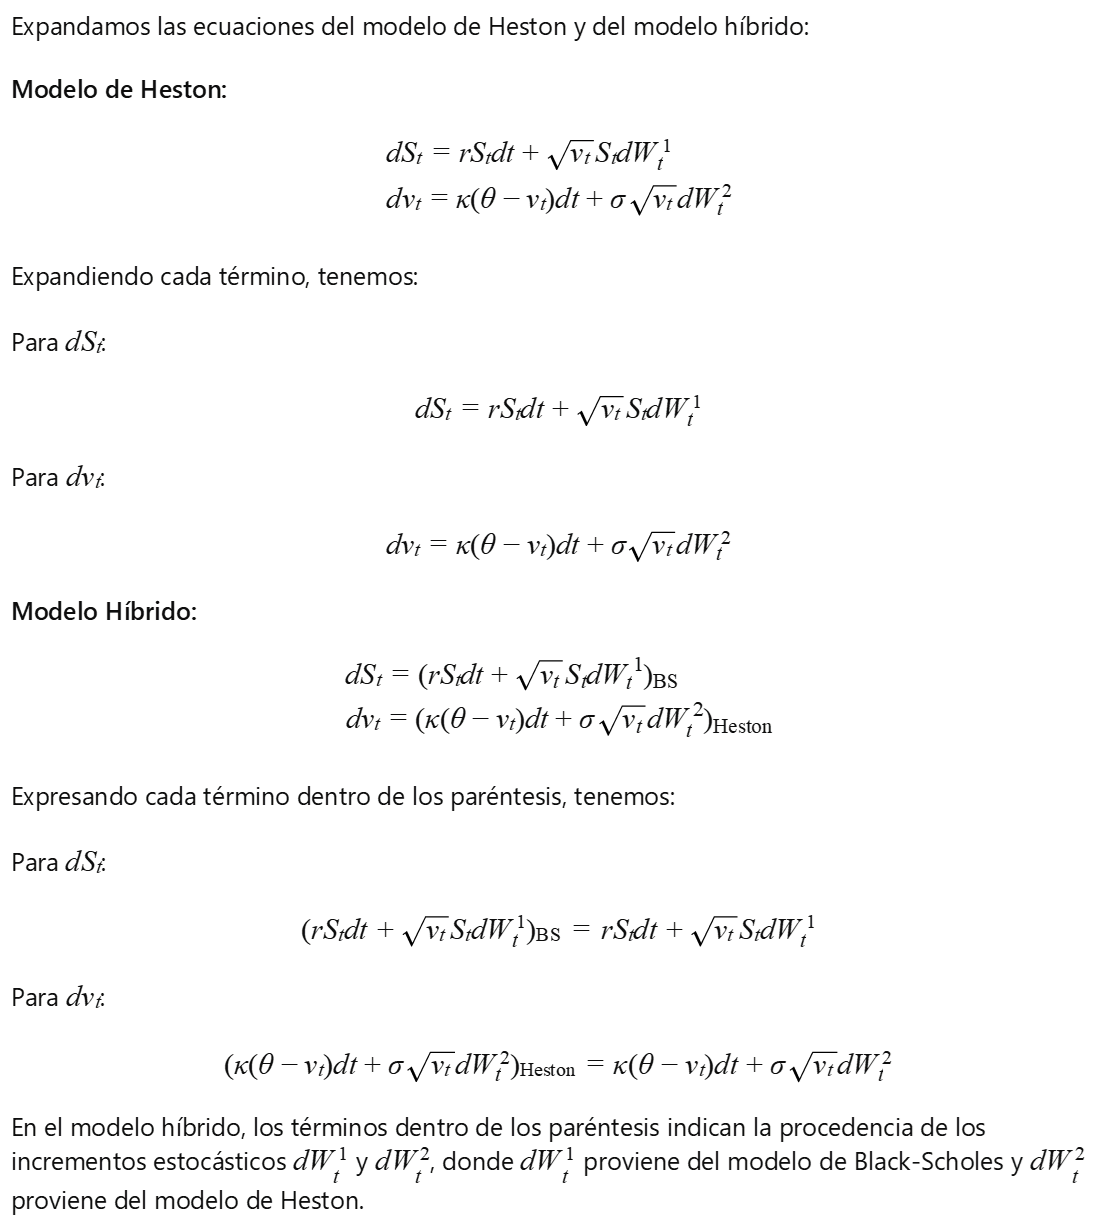

Expandamos las ecuaciones del modelo de Heston y del modelo híbrido:

Modelo de Heston:


dSt = rStdt +

vt StdW 1

dvt = κ(θ − vt)dt + σ

vt dW 2



Expandiendo cada término, tenemos:

Para dSt:

 dSt = rStdt +

vt StdW 1


Para dvt:

dvt = κ(θ − vt)dt + σ

vt dW 2


Modelo Híbrido:

dSt = (rStdt +

vt StdW 1)BS

dvt = (κ(θ − vt)dt + σ

vt dW 2)Heston


Expresando cada término dentro de los paréntesis, tenemos:

Para dSt:

(rStdt +

vt StdW 1)BS = rStdt +

vt StdW 1

Para dvt:

(κ(θ − vt)dt + σ

vt dW 2)Heston = κ(θ − vt)dt + σ

vt dW 2

En el modelo híbrido, los términos dentro de los paréntesis indican la procedencia de los incrementos estocásticos dW 1 y dW 2, donde dW 1 proviene del modelo de Black-Scholes y dW 2
t	t	t	t
proviene del modelo de Heston.

A la pregunta de qué entonces mediante la formula el modelo de Heston seria exactamente igual al modelo hibrido, la respuesta seria negativa, los modelos de Heston y híbrido no son exactamente iguales. La diferencia clave radica en cómo se modela la evolución de la volatilidad (vt).

En el modelo de Heston, la volatilidad sigue una dinámica estocástica determinada por la ecuación:

 Mientras que, en el modelo híbrido, se mantiene la misma ecuación para la volatilidad, pero el precio del activo (St) sigue la dinámica del modelo de Black-Scholes, lo que significa que el término (dSt)
  se calcula de acuerdo con la fórmula de Black-Scholes y no se ve afectado por la volatilidad estocástica, como en el modelo de Heston.

Por lo tanto, aunque comparten la misma ecuación para la evolución de la volatilidad, la forma en que se modela el precio del activo subyacente es diferente entre el modelo de Heston y el modelo híbrido.

 Entonces al demostrar la diferencia exacta entre ambos modelos, la diferencia clave entre el modelo de Heston y el modelo híbrido radica en cómo se modela la evolución de la volatilidad (vt). En el modelo de Heston, la volatilidad sigue una dinámica
estocástica determinada por la ecuación:


dvt = κ(θ − vt)dt + σ

Donde:

vt dW Heston

vt es la volatilidad estocástica en el tiempo t. κ es la velocidad de reversión hacia la media. θ es la media a largo plazo de la volatilidad. σ es la volatilidad de la volatilidad.
dW Heston es un proceso de Wiener (movimiento Browniano).

En contraste, en el modelo híbrido, la evolución de la volatilidad se mantiene igual a la del modelo de Heston, pero la evolución del precio del activo subyacente se ajusta para reflejar el modelo de Black-Scholes. En términos matemáticos, esto se expresa como:


dSt = (rStdt +

Donde:

  vt StdW1t)BS

St es el precio del activo subyacente en el tiempo t. r es la tasa de interés libre de riesgo.
vt es la volatilidad estocástica en el tiempo t.
W1t es un proceso de Wiener (movimiento Browniano).

La diferencia radica en cómo se integra la volatilidad estocástica en la dinámica del precio del activo subyacente: en el modelo de Heston, se utiliza la dinámica completa de Heston, mientras
que, en el modelo híbrido, se combina la dinámica del precio del activo subyacente del modelo de Black-Scholes con la volatilidad estocástica del modelo de Heston.

A la pregunta de qué dado que la diferencia radica en cómo se integra la volatilidad estocástica en la dinámica del precio del activo subyacente: en el modelo de Heston, se utiliza la dinámica completa de Heston, mientras que, en el modelo híbrido, se combina la dinámica del precio del activo subyacente del modelo de Black-Scholes con la volatilidad estocástica del modelo de Heston. El modelo hibrido sería más eficiente en medir con precisión tanto la dinámica del precio del activo subyacente, así como la volatilidad estocástica. Tenemos que la respuesta en teoría, el modelo híbrido puede ser más eficiente para capturar tanto la dinámica del precio del activo subyacente como la volatilidad estocástica en ciertos contextos. La razón principal es que el modelo híbrido combina lo mejor de ambos mundos: utiliza la simplicidad y eficiencia computacional del modelo de Black-Scholes para modelar la dinámica del precio del activo subyacente, mientras que incorpora la complejidad y la capacidad de captura de la volatilidad estocástica del modelo de Heston.

Sin embargo, la eficiencia del modelo híbrido dependerá en gran medida de la precisión de los parámetros utilizados y de la calidad de los datos de entrada. En algunos casos, el modelo de Heston puede ser más adecuado si la volatilidad estocástica es el factor dominante en la dinámica del precio del activo subyacente, mientras que, en otros casos, el modelo de Black-Scholes podría ser suficiente si la volatilidad se considera relativamente constante o si se desea una simulación más rápida y menos intensiva en recursos.

En resumen, la eficiencia y precisión del modelo híbrido dependen de la naturaleza específica del activo subyacente, las condiciones del mercado y los objetivos del análisis financiero. Es importante evaluar cuidadosamente cada modelo en función de las necesidades y características del problema en cuestión.

Variables fundamentales:

En el modelo de Heston, se utiliza la dinámica completa de Heston, mientras que, en el modelo híbrido, se combina la dinámica del precio del activo subyacente del modelo de Black-Scholes con la volatilidad estocástica del modelo de Heston. En el modelo de Black-Scholes, la variable que describe la dinámica del precio del activo subyacente es St, que representa el precio del activo en el tiempo t.
En el modelo de Heston, la variable que describe la volatilidad estocástica es vt, que representa la varianza estocástica (volatilidad al cuadrado) en el tiempo t.

Es decir:

Del Modelo hibrido, St: precio del activo en el tiempo t.
         Del modelo Black-Scholes, Vt: la varianza estocástica (volatilidad al cuadrado) en el tiempo t.
         Del modelo Heston, la dinámica completa.

**Modelo Híbrido LSTM-Heston con componentes de redes neuronales:**

Vamos a profundizar en la explicación matemática de cada componente y cómo se integran en el modelo híbrido.
Modelo de Heston: La dinámica del modelo de Heston está dada por las siguientes ecuaciones estocásticas diferenciales (SDEs):

dSt=rStdt+vtStdW

dvt=κ(θ−vt)dt+σvtdW2

donde:
•	St es el precio del activo subyacente en el tiempo t.
•	vt es la volatilidad estocástica (varianza) en el tiempo t.
•	r es la tasa de interés libre de riesgo.
•	κ es la velocidad de reversión hacia la media.
•	θ es la media a largo plazo de la volatilidad.
•	σ es la volatilidad de la volatilidad.
•	dW1 y dW2 son incrementos infinitesimales de procesos de Wiener (movimiento Browniano).

Proceso de Simulación de Heston: La volatilidad vt se simula iterativamente para cada paso de tiempo dt utilizando las ecuaciones de Heston. Este proceso proporciona una serie de volatilidades que capturan la dinámica estocástica de la volatilidad a lo largo del tiempo.

Modelo LSTM: La red LSTM es una arquitectura de red neuronal que procesa secuencias temporales de datos. En este caso, se utiliza para aprender patrones en la secuencia de volatilidades generadas por el modelo de Heston.

Proceso de Preparación para la LSTM: Se crea una secuencia de entrada para la LSTM (Xlstm) utilizando las últimas 10 volatilidades generadas por el modelo de Heston. Esto permite a la LSTM aprender de la historia reciente de la volatilidad.
Predicción de la LSTM: La secuencia Xlstm se pasa
 a través del modelo LSTM, y se obtiene una predicción (lstm_output) que representa la proyección de la volatilidad futura según el aprendizaje de patrones de la LSTM.

Cálculo del Precio de la Opción: El precio de la opción en cada simulación se calcula mediante la fórmula de opción de compra Black-Scholes modificada, donde la volatilidad (σ) se ajusta utilizando la proyección de la LSTM (lstm_output). El precio de la opción se agrega al vector de precios (call_prices).

Resultado Final: La función devuelve el precio promedio de la opción de compra sobre todas las simulaciones.

Ejemplo de Uso: Se proporciona un ejemplo de cómo llamar a la función, especificando los parámetros necesarios, incluyendo el modelo LSTM y los parámetros del modelo de Heston.

**Comentarios Adicionales: **

•	La integración de la LSTM permite al modelo adaptarse a patrones no lineales y complejidades en la secuencia de volatilidades generadas por el modelo de Heston.

•	La fórmula de Black-Scholes se modifica para incorporar la volatilidad proyectada por la LSTM, buscando mejorar la precisión de la valoración de opciones al capturar tanto la dinámica del precio como la complejidad de la volatilidad estocástica.

**Diferencia entre los modelos híbridos tradicional y de aprendizaje profundo.**

La principal diferencia entre el Modelo Híbrido Tradicional Black-Scholes-Heston y el Modelo Híbrido LSTM-Heston con componentes de redes neuronales radica en la forma en que se modela y procesa la información de volatilidad.

En el Modelo Híbrido Tradicional Black-Scholes-Heston, la dinámica de la volatilidad se sigue utilizando el modelo estocástico de Heston, que es conocido por capturar fenómenos observados en los mercados financieros, como la sonrisa de volatilidad. La parte determinista del modelo se basa en la fórmula de Black-Scholes para la dinámica del precio del activo subyacente.

En cambio, en el Modelo Híbrido LSTM-Heston con componentes de redes neuronales, se incorpora una red neuronal LSTM para aprender y modelar patrones no lineales en la secuencia de volatilidades generadas por el modelo de Heston. Esto permite al modelo adaptarse a complejidades no lineales y aprender relaciones temporales en los datos de volatilidad.

En resumen, la diferencia clave es la introducción de la red neuronal LSTM en el segundo modelo, lo que le brinda al modelo la capacidad de aprender patrones más complejos en la secuencia temporal de volatilidades, potencialmente mejorando la capacidad de predicción y adaptación a condiciones no lineales en comparación con el enfoque más tradicional del primer modelo.

**Matemáticamente: **

Matemáticamente, la diferencia entre el Modelo Híbrido Tradicional Black-Scholes-Heston y el Modelo Híbrido LSTM-Heston con componentes de redes neuronales radica en cómo se modela la volatilidad y se incorpora la red neuronal LSTM en el segundo modelo. Aquí está la explicación matemática de cada modelo:

**Modelo Híbrido Tradicional Black-Scholes-Heston:**

La dinámica del precio del activo subyacente (St) y la volatilidad (vt) en el modelo híbrido tradicional sigue las ecuaciones diferenciales estocásticas (SDE) de Black-Scholes y Heston, respectivamente:
Para el precio del activo (St):

dSt=rStdt+vtStdW

Para la volatilidad (vt):

dvt=κ(θ−vt)dt+σvtdW

Donde:
•	r es la tasa de interés libre de riesgo.
•	κ es la velocidad de reversión hacia la media.
•	θ es la media a largo plazo de la volatilidad.
•	σ es la volatilidad de la volatilidad.
•	dW1 y dW2 son incrementos infinitesimales de procesos de Wiener (movimiento Browniano).

**Modelo Híbrido LSTM-Heston con componentes de redes neuronales:**

En este modelo, se introduce una red neuronal LSTM para procesar la secuencia de volatilidades generadas por el modelo de Heston. La red LSTM toma como entrada las últimas 10 volatilidades (vt) y aprende patrones en esa secuencia. La salida de la LSTM (lstm_output) se utiliza en la fórmula de Black-Scholes modificada para calcular el precio de la opción de compra.
La fórmula de Black-Scholes modificada en este contexto sería:

Call_Price=max(St−K,0)e−rT+lstm_output

Donde:

•	K es el precio de ejercicio de la opción.
•	T es el tiempo hasta la expiración de la opción.

La red neuronal LSTM agrega un componente adicional al modelo, permitiendo que el sistema aprenda patrones no lineales y complejidades en la secuencia temporal de volatilidades, mejorando así la capacidad del modelo para adaptarse a la información histórica y proporcionar predicciones más precisas.



---

